<a href="https://colab.research.google.com/github/NTHieu2k1/Fashion_Classification_SVM/blob/main/Fashion-MNIST_first_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
%matplotlib inline

In [ ]:
# Create a transform method
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
# Get the dataset (applying the transform method)
train_set = datasets.FashionMNIST('Train_Fashion_MNIST', train=True, download=True, transform=transform)
test_set = datasets.FashionMNIST('Test_Fashion_MNIST', train=False, download=True, transform=transform)


Extracting Train_Fashion_MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to Train_Fashion_MNIST/FashionMNIST/raw




Extracting Train_Fashion_MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Train_Fashion_MNIST/FashionMNIST/raw




Extracting Train_Fashion_MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Train_Fashion_MNIST/FashionMNIST/raw




Extracting Train_Fashion_MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Train_Fashion_MNIST/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)



Extracting Test_Fashion_MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to Test_Fashion_MNIST/FashionMNIST/raw




Extracting Test_Fashion_MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Test_Fashion_MNIST/FashionMNIST/raw




Extracting Test_Fashion_MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Test_Fashion_MNIST/FashionMNIST/raw




Extracting Test_Fashion_MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Test_Fashion_MNIST/FashionMNIST/raw



In [ ]:
# Show size of every sets
print('Size of training set: {}'.format(len(train_set)))
print('Size of test set: {}'.format(len(test_set)))

Size of training set: 60000
Size of test set: 10000


In [ ]:
# Load every sets
train_data = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_data = torch.utils.data.DataLoader(test_set, batch_size=32)

In [ ]:
# Brief analyze the training data
print('Number of batches in training data: {}'.format(len(train_data)))
print('Batch size: {}'.format(train_data.batch_size))

Number of batches in training data: 1875
Batch size: 32


In [ ]:
# Go into a batch
batch_iter = iter(train_data)
batch = next(batch_iter)
images, labels = batch
print('Shape of image batch: {}'.format(images.shape))
print('Shape of label batch: {}'.format(labels.shape))
print('\nNumber of images in the batch: {}'.format(images.shape[0]))
print('Size of each image: {0}x{1}'.format(images.shape[2], images.shape[3]))
print('Number of channels: {}'.format(images.shape[1]))
print('Number of labels: {}'.format(labels.shape[0]))

Shape of image batch: torch.Size([32, 1, 28, 28])
Shape of label batch: torch.Size([32])

Number of images in the batch: 32
Size of each image: 28x28
Number of channels: 1
Number of labels: 32


Visualize image example:


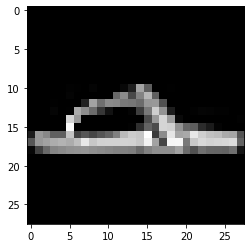


Label: 5


In [ ]:
# Visualize an image example
sample_img = images[0, 0]
print('Visualize image example:')
plt.imshow(sample_img, cmap='gray')
plt.show()
print('\nLabel: {}'.format(labels[0]))

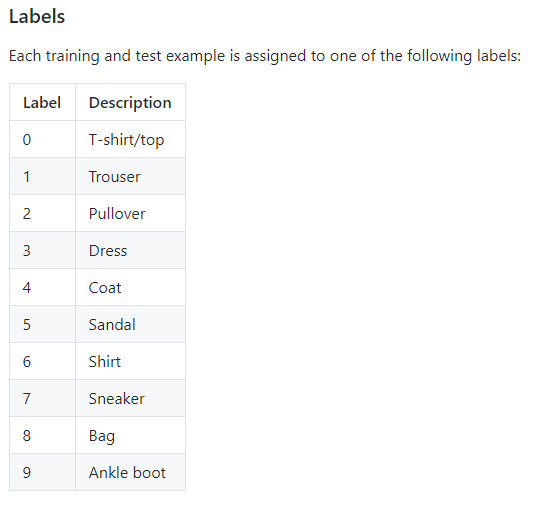

Visualize part of image:


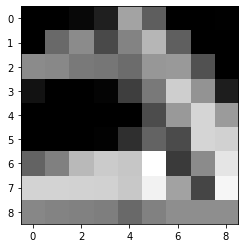


Show pixel values:
tensor([[0.0000, 0.0000, 0.0314, 0.1216, 0.6392, 0.3686, 0.0000, 0.0000, 0.0039],
        [0.0000, 0.4118, 0.5451, 0.2902, 0.5137, 0.7137, 0.3725, 0.0000, 0.0000],
        [0.5451, 0.5333, 0.4784, 0.4627, 0.4235, 0.5922, 0.6000, 0.3216, 0.0000],
        [0.0706, 0.0000, 0.0000, 0.0157, 0.2431, 0.4784, 0.8078, 0.5804, 0.1137],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2980, 0.6000, 0.8353, 0.6078],
        [0.0000, 0.0000, 0.0000, 0.0078, 0.1843, 0.3882, 0.2941, 0.8353, 0.8196],
        [0.3882, 0.5020, 0.7255, 0.7961, 0.7765, 1.0000, 0.2275, 0.5451, 0.8980],
        [0.8314, 0.8314, 0.8235, 0.8196, 0.7843, 0.9490, 0.6353, 0.2706, 0.9647],
        [0.5294, 0.5137, 0.5059, 0.4941, 0.4157, 0.5059, 0.5569, 0.5569, 0.5569]])


In [ ]:
# Go deep into the image
crop_img = sample_img[10:19, 10:19]     # Crop size is 9x9
print('Visualize part of image:')
plt.imshow(crop_img, cmap='gray')
plt.show()
print('\nShow pixel values:')
print(crop_img)

Visualize 5 images:


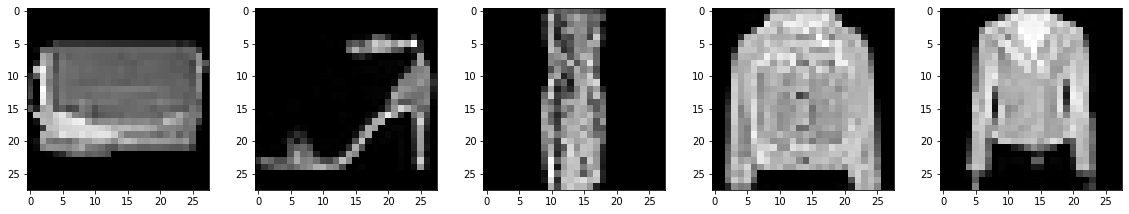


Their labels:
tensor([8, 5, 3, 4, 4])


In [ ]:
# Visualize next 5 images with their labels
print('Visualize 5 images:')
img_array = images[1:6, 0]
label_array = labels[1:6]
fig, axes = plt.subplots(1, 5, figsize=(16, 3))
axes = axes.flatten()
for image, ax in zip(img_array, axes):
    ax.imshow(image, cmap='gray')
plt.tight_layout()
plt.show()
print('\nTheir labels:\n{}'.format(label_array))

In [ ]:
# Labels: bag, sandal, dress, coat, coat